In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from seaborn import plotting_context

In [2]:
#model_3
DIR = 'us_import2'

In [55]:
def get_df_dict(DIR):
    df_dict = {}
    df = None
    for _file in glob.glob('./accuracy_check/{}/**.csv'.format(DIR))[-10:]:
        _df = pd.read_csv(_file, index_col=None)
        if df is None:
            df = _df
        else:
            df = df.append(_df,ignore_index=True)
    df_model = df.groupby(['idx']).mean().reset_index()
    df_model = df_model.head(100)
    df_model = df_model.rename(columns={'precision@25':'precision'})
    df_dict['RSM'] = df_model
    
    _file = './../baseline_2/classifier_op/LR/{}/results.csv'.format(DIR)
    df = pd.read_csv(_file, index_col=None)
    df_lr = df.groupby(['idx']).mean().reset_index() 
    df_lr = df_lr.head(100)
    df_dict['LR'] = df_lr
    
    _file = './../baseline_2/classifier_op/KNN/{}/results.csv'.format(DIR)
    df = pd.read_csv(_file, index_col=None)
    df_knn = df.groupby(['idx']).mean().reset_index() 
    df_knn =  df_knn.head(100)
    df_dict['KNN'] = df_knn
        
    _file = './../baseline_2/classifier_op/DT/{}/results.csv'.format(DIR)
    df = pd.read_csv(_file, index_col=None)
    df_dt = df.groupby(['idx']).mean().reset_index()
    df_dt = df_dt.head(100)
    df_dict['DT'] = df_dt

    _file = './../baseline_2/classifier_op/SGC/{}/results.csv'.format(DIR)
    df = pd.read_csv(_file, index_col=None)
    df_sgc = df.groupby(['idx']).mean().reset_index() 
    df_sgc = df_sgc.head(100)
    df_dict['SVM'] = df_sgc

    _file = './../baseline_2/classifier_op/RF/{}/results.csv'.format(DIR)
    df = pd.read_csv(_file, index_col=None)
    df_rf = df.groupby(['idx']).mean().reset_index() 
    df_rf = df_rf.head(100)
    df_dict['RF'] = df_rf
    return df_dict

In [56]:
def plot_fig(DIR):
    df_dict = get_df_dict(DIR)
    sns.set(font_scale = 1.05)
    sns.set_style("whitegrid")
    with plotting_context( "paper", rc={"font.size":14,"axes.titlesize":15,"axes.labelsize":14, "axes.xticksize":14}):    
        sns.set_style("whitegrid")
        fig = plt.subplots(figsize=[5,4])
        plt.ylim(0, 1.025)
        obj = cm.ScalarMappable()
        obj.set_cmap('jet')
        obj.set_cmap('rainbow')
        colors = obj.to_rgba(np.arange(6))
        plt.tick_params(axis='both', which='major', labelsize=12)
        sns.set_style("whitegrid")
        j = 0
        for key, _df in df_dict.items():
            _df = _df.append({'idx':0, 'precision':0.25},ignore_index=True)
            color = colors[j]
            if key =='RSM':
                sns.lineplot(data = _df, x ='idx', y='precision',
                    linewidth=1.75,
                    color=colors[j],
                    alpha=0.85, 
                    markers=True,
                    marker='o', label=key,markersize=6.5)
            else:
                sns.lineplot(data = _df, x ='idx', y='precision', color=colors[j], alpha=0.75, linewidth=1.05, label=key)
            j+=1
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.axhline(0.25,color='crimson', alpha=0.80, ls='--') 
        plt.xlabel(xlabel='Feedback Iteration', fontsize=19)
        plt.ylabel(ylabel=None)
        plt.legend(fontsize=15)
        plt.tight_layout()
        plt.savefig('{}.pdf'.format(DIR), pad_inches=0.001, dpi =120)
        plt.show()
    return



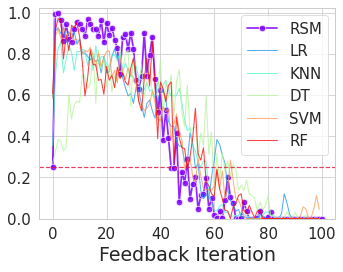

In [57]:
plot_fig('us_import1')

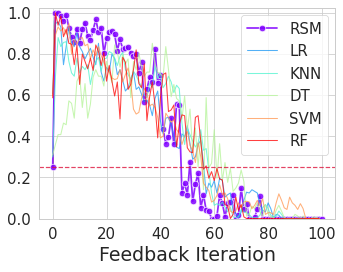

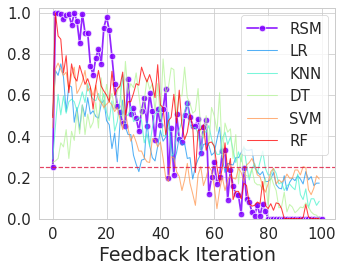

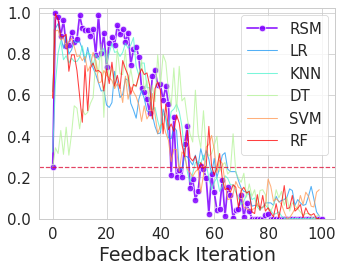

In [58]:
plot_fig('us_import2')
plot_fig('us_import3')
plot_fig('us_import4')

In [163]:
help(obj)

Help on ScalarMappable in module matplotlib.cm object:

class ScalarMappable(builtins.object)
 |  ScalarMappable(norm=None, cmap=None)
 |  
 |  A mixin class to map scalar data to RGBA.
 |  
 |  The ScalarMappable applies data normalization before returning RGBA colors
 |  from the given colormap.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, norm=None, cmap=None)
 |      Parameters
 |      ----------
 |      norm : `matplotlib.colors.Normalize` (or subclass thereof)
 |          The normalizing object which scales data, typically into the
 |          interval ``[0, 1]``.
 |          If *None*, *norm* defaults to a *colors.Normalize* object which
 |          initializes its scaling based on the first data processed.
 |      cmap : str or `~matplotlib.colors.Colormap`
 |          The colormap used to map normalized data values to RGBA colors.
 |  
 |  add_checker(self, checker)
 |      [*Deprecated*] 
 |      
 |      Notes
 |      -----
 |      .. deprecated:: 3.3
 |         \


In [159]:
help(cm)

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    
    class ScalarMappable(builtins.object)
     |  ScalarMappable(norm=None, cmap=None)
     |  
     |  A mixin class to map scalar data to RGBA.
     |  
     |  The ScalarMappable applies data normalization before returning RGBA colors
     |  from the given colormap.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, norm=None, cmap=None)
     |      Pa